# The EEG Brainwave Dataset contains electronic brainwave signals from an EEG headset and is in temporal format.

The challenge is: Can we predict emotional sentiment from brainwave readings?

Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
brainwave_df = pd.read_csv('C:\\Users\\moona\\Desktop\\2019EEGandStudentpredictions\\kagglesleep/emotions.csv')

In [3]:
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
brainwave_df.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [5]:
brainwave_df.shape

(2132, 2549)

In [6]:
brainwave_df.dtypes

# mean_0_a     float64
mean_1_a       float64
mean_2_a       float64
mean_3_a       float64
mean_4_a       float64
mean_d_0_a     float64
mean_d_1_a     float64
mean_d_2_a     float64
mean_d_3_a     float64
mean_d_4_a     float64
mean_d_0_a2    float64
mean_d_1_a2    float64
mean_d_2_a2    float64
mean_d_3_a2    float64
mean_d_4_a2    float64
mean_d_5_a     float64
mean_d_6_a     float64
mean_d_7_a     float64
mean_d_8_a     float64
mean_d_9_a     float64
mean_d_10_a    float64
mean_d_11_a    float64
mean_d_12_a    float64
mean_d_13_a    float64
mean_d_14_a    float64
mean_d_15_a    float64
mean_d_16_a    float64
mean_d_17_a    float64
mean_d_18_a    float64
mean_d_19_a    float64
                ...   
fft_721_b      float64
fft_722_b      float64
fft_723_b      float64
fft_724_b      float64
fft_725_b      float64
fft_726_b      float64
fft_727_b      float64
fft_728_b      float64
fft_729_b      float64
fft_730_b      float64
fft_731_b      float64
fft_732_b      float64
fft_733_b  

In [7]:
#Descriptive Statistics

In [8]:
brainwave_df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


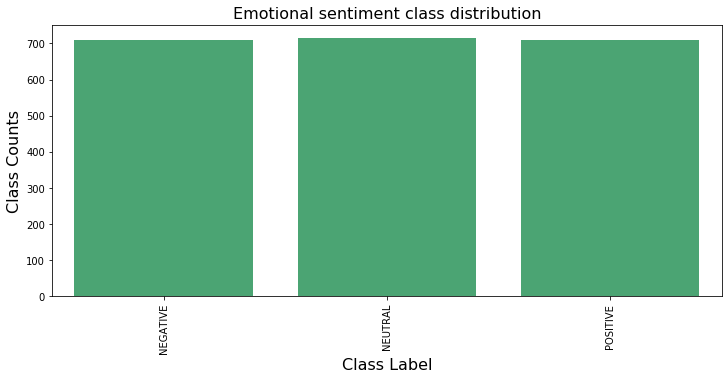

In [9]:
# class distribution
plt.figure(figsize=(12,5))
sns.countplot(x=brainwave_df.label, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

# Correlation Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together.
The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

In [10]:
label_df = brainwave_df['label']
brainwave_df.drop('label', axis = 1, inplace=True)

In [11]:
correlations = brainwave_df.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
mean_d_0_a,-0.000665,-0.088608,0.015122,-0.117748,-0.017196,1.000000,-0.520816,0.289196,0.424223,0.263961,...,0.036257,0.001320,0.007608,0.007608,0.001320,0.024944,0.002976,-0.017169,-0.017169,0.002976
mean_d_1_a,0.105961,-0.007586,0.014605,0.124462,-0.007570,-0.520816,1.000000,-0.299949,0.274802,-0.087698,...,-0.051368,-0.006839,-0.024373,-0.024373,-0.006839,-0.043387,-0.001477,0.003350,0.003350,-0.001477
mean_d_2_a,-0.061046,-0.050463,-0.004320,-0.175592,0.025546,0.289196,-0.299949,1.000000,0.060814,0.011967,...,0.095084,-0.053074,0.144749,0.144749,-0.053074,0.098389,-0.061713,0.149472,0.149472,-0.061713
mean_d_3_a,0.135370,-0.119391,0.055625,-0.001782,-0.033443,0.424223,0.274802,0.060814,1.000000,0.110584,...,-0.020794,-0.006047,-0.042957,-0.042957,-0.006047,-0.022019,0.005671,-0.040408,-0.040408,0.005671
mean_d_4_a,0.008472,-0.017197,-0.003564,0.017110,-0.020361,0.263961,-0.087698,0.011967,0.110584,1.000000,...,0.003370,-0.000915,0.000092,0.000092,-0.000915,-0.003329,-0.005395,0.003422,0.003422,-0.005395


In [12]:
#Skew of Univariate Distributions
skew = brainwave_df.skew()
skew

# mean_0_a      3.839961
mean_1_a       -5.400903
mean_2_a       -1.769376
mean_3_a        0.293842
mean_4_a       -3.911369
mean_d_0_a      5.037609
mean_d_1_a      0.259055
mean_d_2_a     -2.678249
mean_d_3_a      4.729592
mean_d_4_a     -5.799641
mean_d_0_a2    -1.280704
mean_d_1_a2   -12.338497
mean_d_2_a2    -1.557033
mean_d_3_a2    -1.505519
mean_d_4_a2   -19.863973
mean_d_5_a      9.340996
mean_d_6_a     -6.490151
mean_d_7_a     -1.619659
mean_d_8_a      3.061302
mean_d_9_a      8.191188
mean_d_10_a    -1.296867
mean_d_11_a   -12.576537
mean_d_12_a    -1.558395
mean_d_13_a    -1.506060
mean_d_14_a   -20.465480
mean_d_15_a     9.316563
mean_d_16_a    -6.483794
mean_d_17_a    -1.626358
mean_d_18_a     3.039943
mean_d_19_a     9.258123
                 ...    
fft_720_b      -1.165149
fft_721_b       1.289832
fft_722_b       0.751271
fft_723_b       0.751271
fft_724_b       1.289832
fft_725_b      -1.271173
fft_726_b       1.322905
fft_727_b       0.663377
fft_728_b       0.663377


In [13]:
y=label_df
X=brainwave_df

In [14]:
y.shape

(2132,)

In [16]:
y

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
5        NEUTRAL
6       POSITIVE
7       NEGATIVE
8        NEUTRAL
9       NEGATIVE
10      POSITIVE
11      NEGATIVE
12       NEUTRAL
13      NEGATIVE
14       NEUTRAL
15      NEGATIVE
16      POSITIVE
17       NEUTRAL
18      NEGATIVE
19      NEGATIVE
20      NEGATIVE
21       NEUTRAL
22      NEGATIVE
23      NEGATIVE
24      POSITIVE
25       NEUTRAL
26      NEGATIVE
27       NEUTRAL
28      POSITIVE
29      POSITIVE
          ...   
2102    NEGATIVE
2103    POSITIVE
2104    POSITIVE
2105     NEUTRAL
2106    POSITIVE
2107     NEUTRAL
2108    POSITIVE
2109    POSITIVE
2110    NEGATIVE
2111    POSITIVE
2112    POSITIVE
2113    POSITIVE
2114     NEUTRAL
2115    POSITIVE
2116    NEGATIVE
2117     NEUTRAL
2118     NEUTRAL
2119    POSITIVE
2120    NEGATIVE
2121    POSITIVE
2122     NEUTRAL
2123     NEUTRAL
2124    NEGATIVE
2125     NEUTRAL
2126    POSITIVE
2127     NEUTRAL
2128    POSITIVE
2129    NEGATI

In [15]:
X.shape

(2132, 2548)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

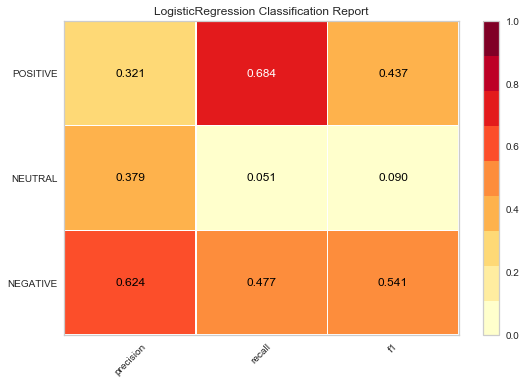

In [18]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

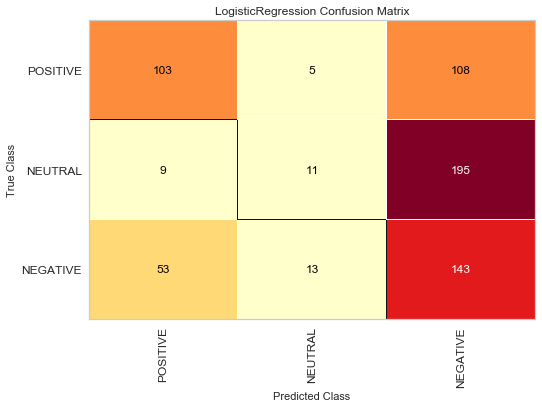

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
classes=["POSITIVE","NEUTRAL","NEGATIVE"]
model = LogisticRegression(multi_class="auto", solver="liblinear")

iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'setosa', 1: 'versicolor'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.poof()

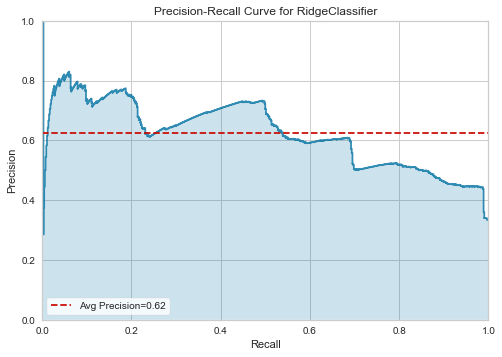

In [21]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

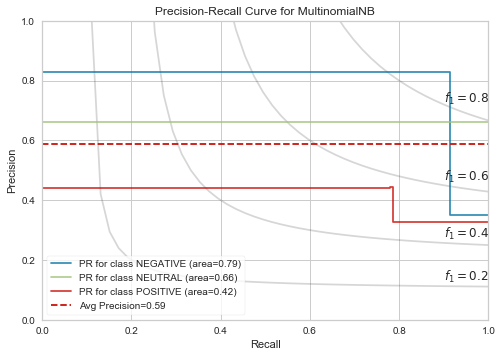

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Load dataset and encode categorical variables
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

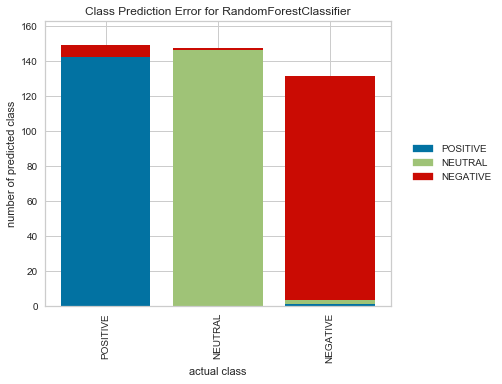

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes=["POSITIVE","NEUTRAL","NEGATIVE"]

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

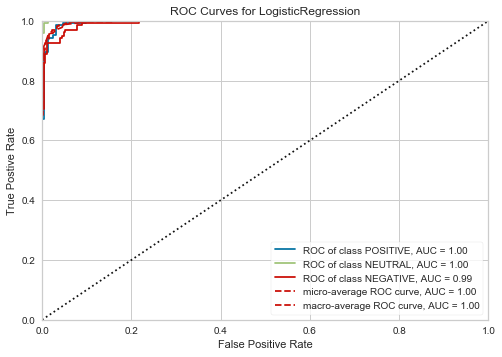

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["POSITIVE","NEUTRAL","NEGATIVE"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()   

# RandomForest Classifier
RandomForest is a tree & bagging approach-based ensemble classifier. It will automatically reduce the number of features by its probabilistic entropy calculation approach.

In [25]:
%%time

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

Accuracy for RandomForest :  0.9760687525070697
Wall time: 8.25 s


# Logistic Regression Classifier
Logistic Regression is a linear classifier and works in same way as linear regression.

In [ ]:
%%time

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

# Principal Component Analysis (PCA)
PCA can transform original low level variables to a higher dimensional space and thus reduce the number of required variables. All co-linear variables get clubbed together.

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(brainwave_df)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [ ]:
#Logistic Regression classifier with these two PCs

In [ ]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

In [ ]:
#Take all 10 PCs
%%time

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

# Artificial Neural Network Classifier (ANN)
An ANN classifier is non-linear with automatic feature engineering and dimensional reduction techniques. MLPClassifier in scikit-learn works as an ANN. But here also, basic scaling is required for the data.

In [ ]:
%%time

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

In [ ]:
#Linear Support Vector Machines Classifier (SVM)
%%time

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])
scores = cross_val_score(pl_svm, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ', scores.mean())

# Extreme Gradient Boosting Classifier (XGBoost)
XGBoost is a boosted tree based ensemble classifier. Like ‘RandomForest’, it will also automatically reduce the feature set.

In [ ]:
%%time
pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, brainwave_df, label_df, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())